In [1]:
import tensorflow as tf
from tensorflow.keras import layers, losses, metrics, optimizers, callbacks
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score
from imblearn.metrics import classification_report_imbalanced

from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

import seaborn as sns
import matplotlib.pyplot as plt
import requests
import numpy as np

import joblib

In [2]:
np.random.seed(42)

## Reading the dataset

In [4]:
df = (
    pd.read_csv("../DryBeanDataset/Dry_Bean_Dataset.csv")
    .sample(frac=1)
    .reset_index(drop=True)
)

In [5]:
df.head(10)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,42339,741.226,260.199330,207.306394,1.255144,0.604347,42676,232.180294,0.771202,0.992103,0.968387,0.892317,0.006146,0.002403,0.796230,0.999383,SEKER
1,68247,1088.754,370.368146,237.863792,1.557060,0.766507,70172,294.779204,0.767683,0.972567,0.723492,0.795909,0.005427,0.001343,0.633471,0.986352,BARBUNYA
2,37856,708.716,248.430330,194.360324,1.278195,0.622835,38232,219.544429,0.744640,0.990165,0.947109,0.883726,0.006563,0.002469,0.780972,0.998235,SEKER
3,33143,648.385,222.526309,189.737379,1.172812,0.522480,33377,205.423899,0.769980,0.992989,0.990685,0.923144,0.006714,0.003008,0.852195,0.999465,SEKER
4,29925,647.570,237.714031,161.004849,1.476440,0.735703,30321,195.196551,0.785309,0.986940,0.896748,0.821140,0.007944,0.002228,0.674271,0.995521,DERMASON
5,38489,707.978,244.119399,200.950084,1.214826,0.567805,38782,221.372349,0.788871,0.992445,0.964955,0.906820,0.006343,0.002646,0.822322,0.998979,SEKER
6,89592,1155.357,452.291405,254.964533,1.773939,0.825968,90627,337.745581,0.795772,0.988580,0.843425,0.746743,0.005048,0.000968,0.557626,0.989193,CALI
7,42379,759.965,251.037567,215.217912,1.166434,0.514795,42840,232.289945,0.763586,0.989239,0.922090,0.925319,0.005924,0.002679,0.856216,0.998720,SEKER
8,203536,1735.247,648.157318,401.698875,1.613540,0.784795,206049,509.067858,0.774879,0.987804,0.849432,0.785408,0.003184,0.000747,0.616866,0.995337,BOMBAY
9,27306,608.784,225.492411,154.595717,1.458594,0.727986,27648,186.459323,0.801491,0.987630,0.925852,0.826898,0.008258,0.002382,0.683761,0.997330,DERMASON


## Creating the model

In [6]:
net = tf.keras.Sequential(
    [
        layers.Dense(512, activation="relu"),
        layers.Dense(256, activation="relu"),
        layers.Dense(7),
    ]
)

In [7]:
X = df.drop(columns=["Class"])
y = df.Class.astype('category').cat.codes

### Without Resampling

In [8]:
# scaling the the data for training!
scaler = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

X_train = scaler.fit_transform(X_train)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25)

In [9]:
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(32)
val_ds = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(16)

In [10]:
net.compile(
    optimizer=optimizers.Adam(learning_rate=3e-4),
    loss=losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[metrics.SparseCategoricalAccuracy()],
)

In [11]:
history = net.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30,
    callbacks=[
        callbacks.ModelCheckpoint("models/5", save_best_only=True, verbose=2),
    ],
)

Epoch 1/30
227/240 [===========================>..] - ETA: 0s - loss: 0.5195 - sparse_categorical_accuracy: 0.8461
Epoch 00001: val_loss improved from inf to 0.24957, saving model to models\5
INFO:tensorflow:Assets written to: models\5\assets
240/240 [==============================] - 3s 7ms/step - loss: 0.5047 - sparse_categorical_accuracy: 0.8501 - val_loss: 0.2496 - val_sparse_categorical_accuracy: 0.9185
Epoch 2/30
229/240 [===========================>..] - ETA: 0s - loss: 0.2352 - sparse_categorical_accuracy: 0.9143
Epoch 00002: val_loss improved from 0.24957 to 0.21705, saving model to models\5
INFO:tensorflow:Assets written to: models\5\assets
240/240 [==============================] - 1s 6ms/step - loss: 0.2337 - sparse_categorical_accuracy: 0.9151 - val_loss: 0.2170 - val_sparse_categorical_accuracy: 0.9232
Epoch 3/30
222/240 [==========================>...] - ETA: 0s - loss: 0.2152 - sparse_categorical_accuracy: 0.9178
Epoch 00003: val_loss improved from 0.21705 to 0.21002, s

Epoch 21/30
239/240 [============================>.] - ETA: 0s - loss: 0.1747 - sparse_categorical_accuracy: 0.9320
Epoch 00021: val_loss improved from 0.20252 to 0.20229, saving model to models\5
INFO:tensorflow:Assets written to: models\5\assets
240/240 [==============================] - 1s 6ms/step - loss: 0.1747 - sparse_categorical_accuracy: 0.9321 - val_loss: 0.2023 - val_sparse_categorical_accuracy: 0.9252
Epoch 22/30
223/240 [==========================>...] - ETA: 0s - loss: 0.1739 - sparse_categorical_accuracy: 0.9312
Epoch 00022: val_loss did not improve from 0.20229
240/240 [==============================] - 1s 4ms/step - loss: 0.1737 - sparse_categorical_accuracy: 0.9321 - val_loss: 0.2024 - val_sparse_categorical_accuracy: 0.9252
Epoch 23/30
223/240 [==========================>...] - ETA: 0s - loss: 0.1730 - sparse_categorical_accuracy: 0.9315
Epoch 00023: val_loss improved from 0.20229 to 0.20225, saving model to models\5
INFO:tensorflow:Assets written to: models\5\assets

In [12]:
# Transforming the test set

X_test = scaler.transform(X_test)

test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(16)

In [13]:
net.evaluate(test_ds)

213/213 [==============================] - 1s 3ms/step - loss: 0.1871 - sparse_categorical_accuracy: 0.9306


[0.18709103763103485, 0.9306493997573853]

In [14]:
preds = net(X_test)
preds = tf.argmax(preds, axis=1)

In [15]:
preds.numpy()

array([0, 3, 0, ..., 6, 2, 0], dtype=int64)

In [16]:
f1_score(y_true=y_test, y_pred=preds.numpy(), average='weighted')

0.9309995805984602

In [17]:
cf = confusion_matrix(y_test, preds)

classes = df.Class.astype("category").cat.categories.tolist()
print(classification_report_imbalanced(y_test, preds, target_names=classes))

                   pre       rec       spe        f1       geo       iba       sup

   BARBUNYA       0.93      0.94      0.99      0.94      0.97      0.93       331
     BOMBAY       1.00      1.00      1.00      1.00      1.00      1.00       135
       CALI       0.98      0.91      1.00      0.94      0.95      0.90       416
   DERMASON       0.95      0.90      0.98      0.92      0.94      0.88       902
      HOROZ       0.95      0.96      0.99      0.95      0.97      0.94       482
      SEKER       0.94      0.96      0.99      0.95      0.98      0.95       504
       SIRA       0.85      0.92      0.96      0.88      0.94      0.89       633

avg / total       0.93      0.93      0.98      0.93      0.96      0.91      3403



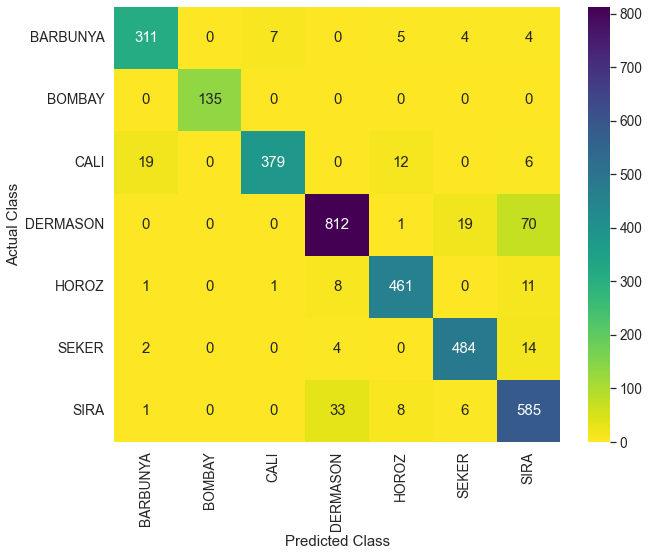

In [18]:
classes = df.Class.astype("category").cat.categories.tolist()
sns.set(rc={"figure.figsize": (10, 8)}, font_scale=1.25)
ax = sns.heatmap(
    cf, annot=True, xticklabels=classes, yticklabels=classes, fmt="d", cmap="viridis_r"
)
ax.set_ylabel("Actual Class")
_ = ax.set_xlabel("Predicted Class")

### With SMOTE Oversampling

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [21]:
X_test.to_csv("../test_files/full_feats_test.csv", index=False)

In [22]:
X_train_sampled, y_train_sampled = SMOTE().fit_resample(X_train, y_train) 

In [23]:
scaler = StandardScaler()

X_train_sampled = scaler.fit_transform(X_train_sampled)

X_train, X_val, y_train, y_val = train_test_split(X_train_sampled, y_train_sampled, test_size=0.25)

In [24]:
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(32)
val_ds = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(16)

In [25]:
history = net.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30,
    callbacks=[
        callbacks.ModelCheckpoint("models/5", save_best_only=True, verbose=3),
    ],
)

Epoch 1/30
422/433 [============================>.] - ETA: 0s - loss: 0.1518 - sparse_categorical_accuracy: 0.9467
Epoch 00001: val_loss improved from inf to 0.13342, saving model to models\5
INFO:tensorflow:Assets written to: models\5\assets
433/433 [==============================] - 2s 5ms/step - loss: 0.1515 - sparse_categorical_accuracy: 0.9467 - val_loss: 0.1334 - val_sparse_categorical_accuracy: 0.9492
Epoch 2/30
417/433 [===========================>..] - ETA: 0s - loss: 0.1296 - sparse_categorical_accuracy: 0.9517
Epoch 00002: val_loss improved from 0.13342 to 0.13141, saving model to models\5
INFO:tensorflow:Assets written to: models\5\assets
433/433 [==============================] - 2s 5ms/step - loss: 0.1300 - sparse_categorical_accuracy: 0.9517 - val_loss: 0.1314 - val_sparse_categorical_accuracy: 0.9497
Epoch 3/30
422/433 [============================>.] - ETA: 0s - loss: 0.1270 - sparse_categorical_accuracy: 0.9527
Epoch 00003: val_loss improved from 0.13141 to 0.13069, s

424/433 [============================>.] - ETA: 0s - loss: 0.1085 - sparse_categorical_accuracy: 0.9592
Epoch 00022: val_loss did not improve from 0.12856
433/433 [==============================] - 2s 5ms/step - loss: 0.1085 - sparse_categorical_accuracy: 0.9594 - val_loss: 0.1289 - val_sparse_categorical_accuracy: 0.9510
Epoch 23/30
428/433 [============================>.] - ETA: 0s - loss: 0.1081 - sparse_categorical_accuracy: 0.9596- ETA: 0s - loss: 0.1020 - sparse_categorical_accur
Epoch 00023: val_loss did not improve from 0.12856
433/433 [==============================] - 2s 5ms/step - loss: 0.1078 - sparse_categorical_accuracy: 0.9598 - val_loss: 0.1289 - val_sparse_categorical_accuracy: 0.9508
Epoch 24/30
425/433 [============================>.] - ETA: 0s - loss: 0.1073 - sparse_categorical_accuracy: 0.9597
Epoch 00024: val_loss did not improve from 0.12856
433/433 [==============================] - 2s 4ms/step - loss: 0.1071 - sparse_categorical_accuracy: 0.9601 - val_loss: 0.

In [26]:
X_test = scaler.transform(X_test)
test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(16)
net.evaluate(test_ds)

213/213 [==============================] - 1s 3ms/step - loss: 0.1981 - sparse_categorical_accuracy: 0.9339


[0.19807274639606476, 0.9338818788528442]

In [27]:
preds = net(X_test)
preds = tf.argmax(preds, axis=1)
preds.numpy()

array([5, 3, 3, ..., 3, 6, 4], dtype=int64)

In [28]:
idx2class = {
    0: "BARBUNYA",
    1: "BOMBAY",
    2: "CALI",
    3: "DERMASON",
    4: "HOROZ",
    5: "SEKER",
    6: "SIRA",
}

In [29]:
f1_score(y_test, preds, average='weighted')

0.9340035161907175

In [30]:
print(classification_report_imbalanced(y_test, preds))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.95      0.92      0.99      0.94      0.96      0.91       318
          1       1.00      1.00      1.00      1.00      1.00      1.00       127
          2       0.94      0.97      0.99      0.96      0.98      0.96       389
          3       0.91      0.94      0.97      0.92      0.95      0.90       912
          4       0.97      0.95      1.00      0.96      0.97      0.95       476
          5       0.98      0.93      1.00      0.95      0.96      0.92       482
          6       0.89      0.89      0.97      0.89      0.93      0.86       699

avg / total       0.93      0.93      0.98      0.93      0.96      0.91      3403



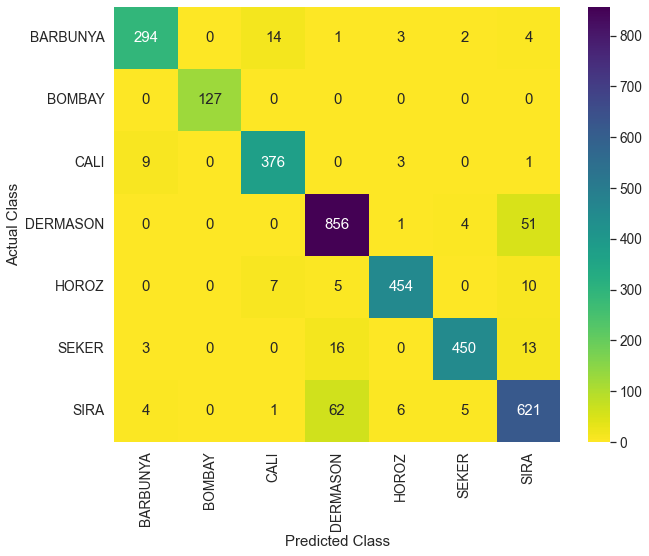

In [31]:
cf = confusion_matrix(y_test, preds)

classes = df.Class.astype("category").cat.categories.tolist()
sns.set(rc={"figure.figsize": (10, 8)}, font_scale=1.25)
ax = sns.heatmap(
    cf, annot=True, xticklabels=classes, yticklabels=classes, fmt="d", cmap="viridis_r"
)
ax.set_ylabel("Actual Class")
_ = ax.set_xlabel("Predicted Class")

In [33]:
joblib.dump(scaler, filename='../ML_models/NN_scaler.scaler')

['../ML_models/NN_scaler.scaler']

In [34]:
test_df = pd.read_csv("../test_files/full_feats_test.csv")

In [35]:
test_df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,40000,727.877,246.699162,206.888462,1.192426,0.544707,40425,225.675833,0.755858,0.989487,0.948755,0.914782,0.006167,0.002664,0.836825,0.997852
1,23689,575.638,205.967800,146.747501,1.403552,0.701695,24018,173.671447,0.765272,0.986302,0.898375,0.843197,0.008695,0.002711,0.710981,0.997899
2,31426,651.033,241.522589,166.167758,1.453486,0.725710,31760,200.032062,0.734578,0.989484,0.931736,0.828213,0.007685,0.002231,0.685936,0.996999
3,71826,1033.615,399.283078,230.561523,1.731785,0.816434,72664,302.409827,0.737744,0.988467,0.844839,0.757382,0.005559,0.001128,0.573628,0.993400
4,62296,970.321,376.031819,211.968931,1.773995,0.825980,63057,281.634037,0.811178,0.987932,0.831456,0.748963,0.006036,0.001172,0.560946,0.995115


In [36]:
y_test[:5]

13123    5
8100     3
5692     3
708      2
2241     2
dtype: int8

In [37]:
fig = ax.get_figure()

In [40]:
fig.savefig('../ML_results/Confusion_matrix_Vanilla_Net_SMOTE.png', bbox_inches='tight')